
# Homework solutions, Week 1, part 3

*Part of the course:
Introduction to Machine Learning (code: KI2V20001), 26/04/2021 to 02/07/2021, Utrecht University*

Total points: 35

Submit one ipynb file per pair, with filename: ```IML2021_week1_part4_wg#_lastname1_lastname2.ipynb```, with your group number or name in place of the # (if you're in different groups, pick one)




# Machine learning

<br>
<br>

---

**Assignment 1** (8 points)

"Consider a bin that contains red and green marbles, possibly infinitely many. The proportion of red and green marbles in the bin is such that if we pick a marble at random, the probability that it will be red is $\mu$ and the probability that it will be green is $1-\mu$. We assume that the value of $\mu$ is unknown to us.

We pick a random sample of N independent marbles (with replacement) from this bin, and observe the fraction v of red marbles within the sample." (From: Learning From Data (Abu-Mostafa et al, 2012))


1. (3) If $\mu = 0.7$, use the Hoeffding Inequality to bound the probability that a sample of 8 marbles will have $\nu \leq 0.1$. (Based on Exercise 1.9 from Learning From Data (Abu-Mostafa et al, 2012).)
* **Answer** Hoeffding's inequality, as formulated in the book of Abu-Mostafa et al (2012)  states<br>
   $P(|\nu - \mu| \gt \epsilon) \leq 2e^{-2n\epsilon^2}$ with $n=8$.<br>
   We know the true mean $\mu$ which is 0.7. If $\nu$ is to be less than 0.1, this means the absolute distance to $\mu$ must be at least 0.6. We can thus plug in $n=8,\epsilon=0.6$ on the RHS and obtain $2e^{-2n\epsilon^2}=2e^{-2\cdot8\cdot0.6^2}\approx 0.006$, see also numpy below.<br>
   <span style="color:green">Note: the observant student may notice that what we need is "$|\nu - \mu| \geq \epsilon$" in the Hoeffding equation, however, the book uses "$\gt$". Fortunately, this hardly matters (why, do you think?).</span>

2. (3) If $\mu = 0.8$, find the smallest value for $N$ that one can find with the Hoeffding inequality for which holds that $\nu$ deviates *at most* $0.05$ from $\mu$ with a probability of at least $0.99$. (Note that the problem has been formulated in a reversed way from the book. In the book the probability represents the *undesired* situation that $\mu$ and $\nu$ deviate more than a predefined threshold. Here it is about the *desired* situation that they deviate at most a given threshold.).

* **Answer** Using a basic property of probabilities, we can write:<br>
(1) $P(|\nu - \mu| \gt \epsilon) = 1 - P(|\nu - \mu| \lt \epsilon)$<br>
Moreover, using Hoeffding, we now also know that:<br>
(2) $\lgroup 1 - P(|\nu - \mu| \lt \epsilon) \rgroup \leq 2e^{-2n\epsilon^2}$<br>
By some simple inequality rewriting, we see that:<br>
(3) $P(|\nu - \mu| \lt \epsilon) \gt 1 - 2e^{-2n\epsilon^2}$<br>
(It is obvious that the sign has to flip, after all, we have multiplied both sides of the inequality with -1.)<br>
Given the requirements in the question, we desire:<br>
(4) $P(|\nu - \mu| \lt 0.05) \gt 0.99$<br>
From this we see that $\epsilon = 0.05$. And we see that if the righthand side of (3) is at least 0.99, we know we are safe. After all, it is a *lower* bound. It is exactly 0.99 when:<br>
(5)  $1 - 2e^{-2n\epsilon^2} = 0.99$<br>
Filling in the $\epsilon = 0.05$ just obtained, and solving for $n$, we get:<br>
(6) $n = \lceil\frac{\ln\lgroup\frac{-(0.99 - 1)}{2}\rgroup}{-2\cdot0.05^2}\rceil = 1060 $<br>
($\lceil x \rceil$ means round to the nearest higher integer.) See verification of this value below, using Python.

* Extra, not required. Calculating the value using Python:

In [9]:
from numpy import log, ceil

n = ceil(log((1-0.99)/2)/(-2*0.05**2))
print(n)

1060.0


1. (2) Akwasi calculates the previous question in another way, and finds a value that is smaller than you found. Is it certain that he made a mistake (assuming you made no mistake in applying Hoeffding)? Why? 
* **Answer** No, that is not certain. Akwasi may have done everything correctly, and may have found a better value for $n$. After all, Hoeffding's inequality only gives an *upper bound* (or with the reverse formulation in the last question, a *lower bound*). Someone may find a sharper bound with another method than Hoeffding. In other words, that is why Hoeffding's inequality is called an *inequality* and not an *equality*. The true value for the given probability can be anywhere within the bound given by Hoeffding's.

---

<br>
<br>

<br>

---

**Assignment 2** (8 points)

Suppose that you are confronted with a machine learning problem that is completely unknown to you. The data-set is offered by an alien from a completely different universe, and no context whatsoever is known. Assume that the target function is binary, and has an infinite input space, and could truly be any binary target function. (This is a stronger version of Exercise 1.12 from Learning From Data (Abu-Mostafa et al, 2012).)

Tip: first thoroughly read Section 1.3.3 in the book. In particular, focus on "The feasibility of learning is thus split into two questions" up to the end of the section. This text explain an essential part of the intuition behind (statistical) machine learning.

1. (2) Answer Exercise 1.12 from the book.
* **Answer** c. In the rest of the answers, an explanation will follow.
2. Now, return to the alien's dataset. Suppose that you decide to put *any* possible function in your hypothesis set $\mathcal{H}$ . Also, assume that you have some way to find the hypothesis $h$ with the lowest $E_\textrm{in}$.
    1. (1) What can you say about the value of $E_\textrm{in}$?
    * **Answer** It has been given that we have a learning algorithm that can always find the hypothesis with the lowest $E_\textrm{in}$. Because every possible function is in our hypothesis set, there is at always at least one perfect match for our data in the hypotheses set. (In fact, there are infinitely many.). Moreover, it has been given that we have a learning algorithm that can always find the hypothesis with the lowest $E_\textrm{in}$. So $E_{in}$ is always 0. Good news.
    2. (1) What can you say about how close $E_\textrm{in}$ and $E_\textrm{out}$ are together? So, what is the value of $P(|E_\textrm{in} - E_\textrm{out}| > \epsilon)$. Consider any possible value for $\epsilon$.
    * **Answer** Here the situation is opposite. This easy to see as follows. Outside of the dataset, the chosen hypothesis can literally be any function. So, in other points than the dataset, it can be defined in any possible way. After all, the hypothesis set contains any possible function. Moreover, the target function can also be any possible function. This means that the probability that you would have chosen an hypothesis that has some correlation with the target function is 0. (Note, the hypothesis will not perform better than chance, so $E_\textrm{out} = 0.5$, which is the worst possible value.)  So, $E_\textrm{in}$ is very far removed from $E_\textrm{out}$.
    * Extra reflection: the conclusion is that, althought $E_{in} = 0$ your hypothesis is completely useles because $E_\textrm{in}$ is not in any way representative for $E_\textrm{out}$, i.e. the out of sample, so the **true**, performance of the hypothesis. This is somewhat analogous to any other measurement-and-control situation, for example,  with a thermometer and cooling/heating elements. Suppose, the ideal temperature for you is 25$^{\circ}$C degrees. You book a hotel room and the owner tells you that you can remotely adjust the temperature before you arrive at the room in the evening. You can do so by remotely playing with a cooling and a heating element in the room, while remotely reading a thermomether, all installed in the room. The cooler and the heater are so strong, that you can reach any possible temperature. And indeed, you succeed. First you are very happy. However, then you find out, from the manufacturer, that the thermometer is broken and has a gigantic measuring error. Then you'll know the reading is completely useless, and also you do not know whether you have reached the right temperature.
3. Now, suppose that you decide to choose a less expressive hypothesis set. For example, you limit $\mathcal{H}$ to all functions that a perceptron can learn.
    1. (1) What can you say about the value of $E_\textrm{in}$?
    * **Answer** Because the target function can be everything, the probability that the limited hypothesis set even contains something that is close to the target function is 0. Therefore, we know that the performance of the hypothesis chosen will be (close to) $E_{in} = 0.5$, the worst possible error, because it is similar to chance (i.e., tossing a coin instead of using the hypothesis, would not be worse.)
    2. (1) What can you say about the "generalisation of the error" from in-of-sample to out-of-sample? So, what is the value of $P(|E_\textrm{in} - E_\textrm{out}| > \epsilon)$. Consider any possible value for $\epsilon$.
    * **Answer** Here the situation is opposite. $E_{out}$ will also be $0.5$ (by a similar reasoning as in the previous question). So, $E_\textrm{in}$ is very close to $E_\textrm{out}$.
    * Extra reflection: the conclusion is, however, the same. The hypothesis is completely useles. Although $E_\textrm{in}$ is very close to $E_\textrm{out}$ (a good thing), we also know that $E_\textrm{in} = 0.5$ (which is the worst possible outcome). In terms of the room temperature measurement-control system:  the manufacturer just told you that the thermometer has been repaired and gives perfect readings. You are now very happy. Unfortunately, it turns out that the heater and cooler have been replaced by something very inferior. Whatever you try with them, you can not get anywhere near the 25$^{\circ}$C degrees. The temperature-control instruments simply do not have sufficient capacity to reach your desired goal. (Similar to: the hypothesis set is too small to reach anywhere near the target function.) The case with the Alien's dataset is infinitely worse than this case, it would comparable to having a desired temperature of 25$^{\circ}$C degrees, while you cannot get it above -273$^{\circ}$C (absolute zero), whatever you try with the heater.
1. (2) This solution is not provided in the multiple-choice question formed by Exercise 1.12. So, what does Exercise 1.12 tacitly assume?

* **Answer** The tacit assumption is that the target function cannot be *anything* but that something is known about it. It must belong to a more restricted class of functions. You can imagine that this is the case, because you and the woman are from the same world, Earth, and we are member of the same species, sharing a great part of our history and biology. So, probably functions that make sense to us are from a more limited class then all possible functions. So, you *do* know something about the dataset, and may be able to make an educated guess about a viable hypothesis set. But what you know is very little, so the probability that you will learn something is very low, albeit not zero. That is why the answer to the question in the book is (c). In the case of the alien, there is truly nothing you know, per definition of the question formulation. Therefore you do not stand any chance of learning anything from the data. For that, there should be added one solution to the question in the book: (d) you'll fail anyway. Poor you. Or better, poor alien.

---

<br>
<br>



<br>
<br>

---

**Assignment 3** (19 points, and 3 bonus-points)

"Consider the perceptron in two dimensions: $h(\mathbf{x}) = sign(\mathbf{w}^{T}\mathbf{x})$ where $\mathbf{w} = [w_0 , w_1 , w_2]^T$ and $\mathbf{x} = [1, x_1 , x_2]^T$. Technically, $\mathbf{x}$ has
three coordinates, but we call this perceptron two-dimensional because the first
coordinate is fixed at 1." (From: Problem 1.2 of Learning From Data (Abu-Mostafa et al, 2012).)

1. (3) The decision boundary is formed by the region in the input space between the regions where the perceptron classifies the input as $+1$ and $-1$. Show that this decision boundary is a line. Tip: what is the value that $h(\mathbf{x})$ has exactly on this decision boundary, when you do not apply the "sign" function? Using that equation, express $x_2$  in terms of the other variables. Be aware that in this context $x_2$ plays the role of $y$ and $x_1$ that of $x$ as you know from good old secondary school mathematics.
* **Answer** The decision boundary is defined as $sign(w^{T} x)=0$, which is only true when $w^{T} x=0$ as per the definition of $sign$.<br><br>
We can thus write the separation boundary as $w_{0}\cdot x_{0}+w_{1}\cdot x_{1}+w_{2}\cdot x_{2}=0$. This is a linear equation which we can rewrite to the well-known "$y=a\cdot x+b$"-form by doing some rewriting:<br>
$\mathbf{w}^{T}\mathbf{x}=0$<br>
$w_{0}\cdot x_{0}+w_{1}\cdot x_{1}+w_{2}\cdot x_{2}=0$<br>
$-w_{2}\cdot x_{2}=w_{0}\cdot x_{0}+w_{1}\cdot x_{1}$<br>
$x_{2}=\tfrac{w_{0}\cdot x_{0}}{-w_{2}}+\tfrac{w_{1}\cdot x_{1}}{-w_{2}}$<br>
$x_{2}=-\tfrac{w_{0}}{w_{2}}\cdot x_{0}-\tfrac{w_{1}}{w_{2}}\cdot x_{1}$<br>
$x_{2}=-\tfrac{w_{0}}{w_{2}}-\tfrac{w_{1}}{w_{2}}\cdot x_{1}$ (because $x_{0}=1$)<br>
Now we rewrite this to the familiar form:<br>
$x_{2}=-\tfrac{w_{1}}{w_{2}}\cdot x_{1}-\tfrac{w_{0}}{w_{2}}$<br>
You immediately recognise the [linear function form](https://en.wikipedia.org/wiki/Linear_function_(calculus)) in this, if you interpet $x_2$ as $y$ and $x_1$ as $x$:<br>
$y=(-\tfrac{w_{1}}{w_{2}})\cdot x+(-\tfrac{w_{0}}{w_{2}})$<br>
So, a line with slope $-\tfrac{w_{1}}{w_{2}}$ and with $y$-intercept $(-\tfrac{w_{0}}{w_{2}}$).

2. (2) (With pen and paper/a graphical tool.) Draw a graph of the decision boundary for the case $\mathbf{w} = [1, 1, 1]^T$<br>

* **Answer** Run the code below:

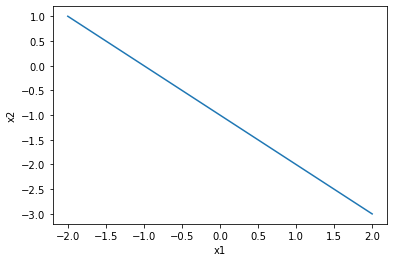

In [2]:
import matplotlib.pyplot as plt

x_min = -2
x_max = 2

def plot_line(x1_array, w0, w1, w2):
    # We now know how to create line 
    def x2(x):
        slope = -(w0/w2)/(w0/w1) if w0!=0 else -w1/w2 # w1x1 + w2x2 = 0 results in w1x1 = -w2x2 => x2 = -w1/w2 x1
        intercept = (-w0/w2)
        result = (slope * x) + intercept
        return result

    plt.plot(x1_array, list(map(x2,x1_array)))
    plt.xlabel("x1")
    plt.ylabel("x2")
    
plot_line(x1_array=[x_min,x_max], w0=1, w1=1, w2=1)

For the following questions, assume that there is no bias, so $w_0 = 0$. So, from now on $\mathbf{w} = [0, 1, 1]^T$.

3. (2) (With pen and paper/a graphical tool.) Draw a graph of the decision boundary for the case $\mathbf{w} = [0, 1, 1]^T$.
4. (2) Draw $\mathbf{w}$ in the same graph, but limit yourself to $w_1$ and $w_2$ only. So, draw the weight-vector $[w_1, w_2]^T$.
5. (2) In the same graph, indicate the regions that are $+1$ and $-1$ by drawing + and - symbols at the right sides of the decision boundary.

* **Answer to 3, 4 and 5** Note that the slope of the decision boundary can easily be determined with the linear-function form derived in question 1. Moreover, because $w_0=0$, it goes through the origin (the point $(0,0)$ in the graph). Run the code below to generate the plot:

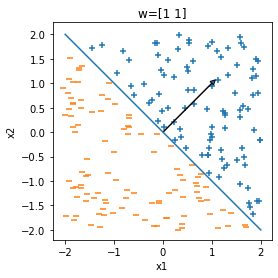

In [3]:
import numpy as np

def get_label(w, x):
    return np.sign(w.T.dot(x))


# Get 500 random examples of (x1,x2)
random_examples = np.random.uniform(x_min, x_max, size=(200,2))


def plot_all(wvector):
    wvector =np.array(wvector)
    hi = plot_line(x1_array=[x_min,x_max], w0=0, w1=wvector[0], w2=wvector[1])
    plt.arrow(0.0, 0.0, wvector[0], wvector[1], head_width=0.1, head_length=0.1)
    pos = np.array([example for example in random_examples if get_label(wvector, example)==1])
    neg = np.array([example for example in random_examples if get_label(wvector, example)==-1])
    plt.scatter(pos[:,0], pos[:,1], marker='+')
    plt.scatter(neg[:,0], neg[:,1],  marker=0)
    plt.title(f"w={wvector}")
    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1) #sets the height to width ratio to 1.5.
    plt.show()
    
plot_all([1,1])

6. (2) Multiply $\mathbf{w}$ by $-1$.  (So, create $\mathbf{w}' = -\mathbf{w} = [-w_0 (=0) , -w_1 , -w_2]^T$.) Create a new graph, and repeat the things you did in the previous three questions.
* **Answer**

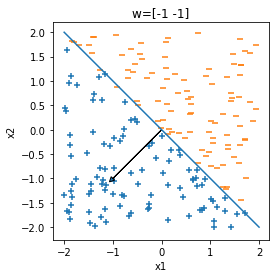

In [28]:
wvector = np.array([-1,-1])
plot_all(wvector)

7. (2) Multiply $\mathbf{w}$ with a constant for which holds both $c > 0$ and $c \neq 1$, creating vector $\mathbf{w}''$ and do the same. So, create a graph and draw the decision boundary, weight-vector and +1 and -1 regions in it.

* **Answer** Run the code:

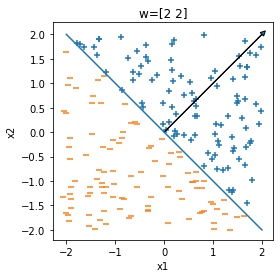

The lesson here is that it doesnt matter if you multiply by scalar.


In [27]:
wvector = 2 * np.array([1,1])
plot_all(wvector)
print("The lesson here is that it doesnt matter if you multiply by scalar.")

8. (2) Now, change the signs of the weight-vector elements of $\mathbf{w}$ such that they are opposing. So, consider $\mathbf{w}''' = [0 , -1 , 1]^T$ and $\mathbf{w}'''' = [0 , 1 , -1]^T$. Draw two graphs for each of these cases as well, with the decision boundary, weight-vector and +1 and -1 regions.

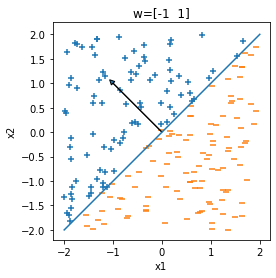

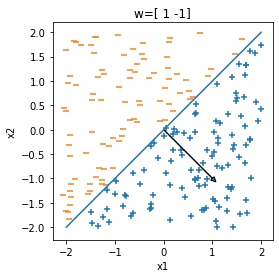

In [30]:
wvector = np.array([-1,1])
plot_all(wvector)
wvector = np.array([1,-1])
plot_all(wvector)


9. (2) What could be the relation of the direction of the weight-vector and the direction of the decision boundary, you think? And what is the relation between the direction of the weight vector and the regions +1 and -1?

* **Answer** The weight vector is always orthogonal/perpendicular to the decision boundary, therefore the inverse also holds the decision boundary is orthogonal/perpendicular to the weight vector. Moreover, the weight vector always points towards the region that is +1.

10. (bonuspoints 3, not required$^*$) prove the relation discovered in the previous question, also for the cases $\mathbf{w}$'s elements can take *any* value.

* **Answer** For now I (Chide) suffice with hints, this answer will be extended later. Orthogonality: use the dot-product rule. Pointing in direction of +1: add $\mathbf{w}$ to an $x$ that is on the line, and conclude that the resulting point has sign + when classified with the perceptron.

$^*$ bonus points count in the following way: your points for this part will be $\textrm{min}(35, \textrm{[total points including bonuspoints]})$. So, bonus points are added to your total, but not beyond the maximum for this part.


---

<br>
<br>